# BIKE SALES EDA 2

In [1]:
import pandas as pd

df = pd.read_csv('../../data/Sales.csv', index_col=0, parse_dates=True)

In [53]:
import duckdb as db

query = db.query(
    """
        SELECT DISTINCT
            Age_Group,
            AVG(Profit) AS avg_profit,
            SUM(Profit) AS sum_profit
        FROM
            df
        GROUP BY
            1
        ORDER BY
            sum_profit DESC
    """
).df()

query

,Age_Group,avg_profit,sum_profit
0,Adults (35-64),292.375717,16321582.0
1,Young Adults (25-34),294.581699,11386761.0
2,Youth (<25),245.377608,4374592.0
3,Seniors (64+),189.267123,138165.0


In [ ]:
# Bra sätt att filtrera snabbt
query.query("Age_Group == 'Seniors (64+)'")

,Age_Group,avg(Profit),sum(Profit)
3,Seniors (64+),189.267123,138165.0


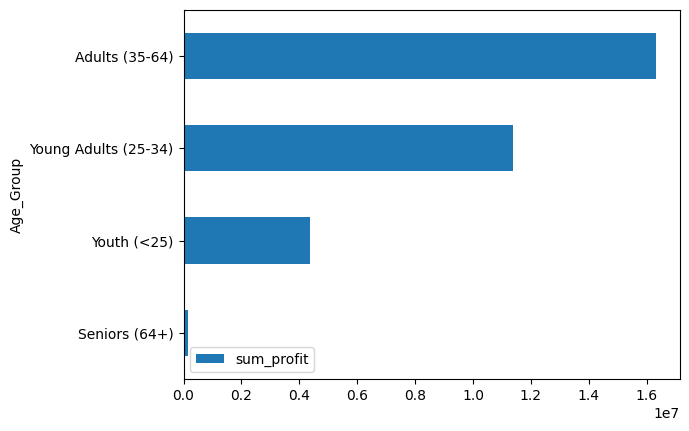

In [54]:
query.sort_values(by="sum_profit", ascending=False)
ax = query.plot(kind="barh", x="Age_Group", y="sum_profit")


ax.invert_yaxis()
